In [50]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


inside_temp = pd.read_csv('../data/temp_71_from_2017_01_01.csv', ',',
                   header=0, names = ['timestamp', 't0', 't1', 't2', 't3', 't4', 't6'],
                   parse_dates=[0], index_col=0, squeeze=True)

vaisala = pd.read_csv('../data/outside.csv', ',',
                   header=0, names = ['timestamp', 'temp', 'rh', 'dew_point', 'press', 'rain', 'wind', 'wind_dir', 'pwv'],
                   parse_dates=[0], index_col=0, squeeze=True)

inside_temp.drop('t3', axis=1, inplace=True) # not connected 
inside_temp.drop('t6', axis=1, inplace=True) # placed in box

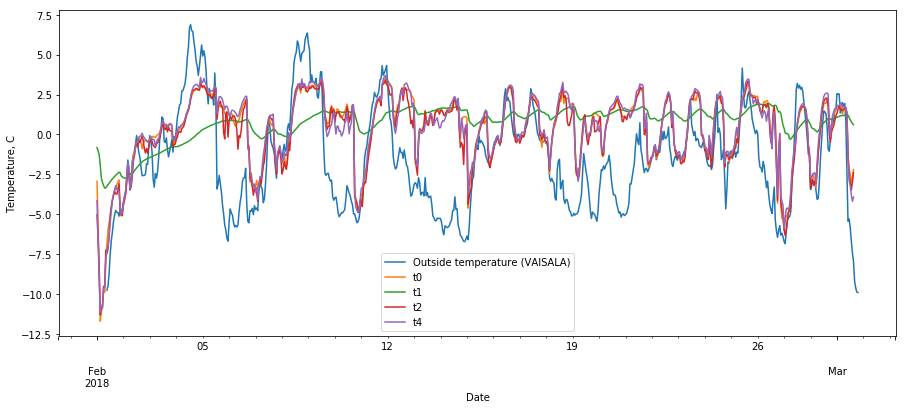

In [144]:
out_t = vaisala['temp'].replace(to_replace=-1000, value=np.nan)
ins_t0 = inside_temp['t0'].replace(to_replace=-1000, value=np.nan)
ins_t1 = inside_temp['t1'].replace(to_replace=-1000, value=np.nan)
ins_t2 = inside_temp['t2'].replace(to_replace=-1000, value=np.nan)
ins_t4 = inside_temp['t4'].replace(to_replace=-1000, value=np.nan)


start_date = '2018-02-01'
stop_date = '2018-03-01'

out_t = out_t[start_date:stop_date]
ins_t0 = ins_t0[start_date:stop_date]
ins_t1 = ins_t1[start_date:stop_date]
ins_t2 = ins_t2[start_date:stop_date]
ins_t4 = ins_t4[start_date:stop_date]

out_t = out_t.fillna(out_t.bfill())
ins_t0 = ins_t0.fillna(ins_t0.bfill())
ins_t1 = ins_t1.fillna(ins_t1.bfill())
ins_t2 = ins_t2.fillna(ins_t2.bfill())
ins_t4 = ins_t4.fillna(ins_t4.bfill())


out_t = out_t.resample('H').mean()
ins_t0 = ins_t0.resample('H').mean()
ins_t1 = ins_t1.resample('H').mean()
ins_t2 = ins_t2.resample('H').mean()
ins_t4 = ins_t4.resample('H').mean()

ax = out_t.plot(label='Outside temperature (VAISALA)', figsize=(15,6))
ins_t0.plot(label='t0', ax=ax)
ins_t1.plot(label='t1', ax=ax)
ins_t2.plot(label='t2', ax=ax)
ins_t4.plot(label='t4', ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature, C')

plt.legend()
plt.show()


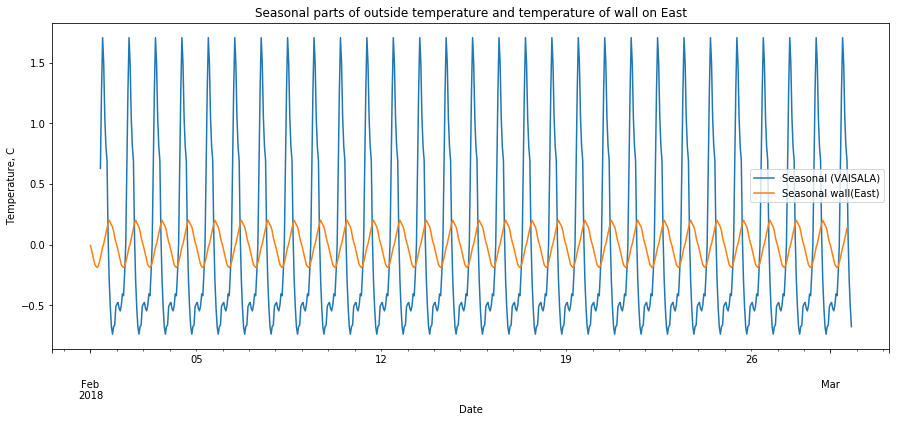

In [160]:
out_t.head(2200)

out_t_decomposition = sm.tsa.seasonal_decompose(out_t, model='additive')
ins_t1_decomposition = sm.tsa.seasonal_decompose(ins_t1, model='additive')
#ins_t1_decomposition.plot()
ax = out_t_decomposition.seasonal.plot(label='Seasonal (VAISALA)', figsize=(15,6))
ins_t1_decomposition.seasonal.plot(label='Seasonal wall(East)', ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature, C')
plt.title('Seasonal parts of outside temperature and temperature of wall on East')
plt.legend()
plt.show()


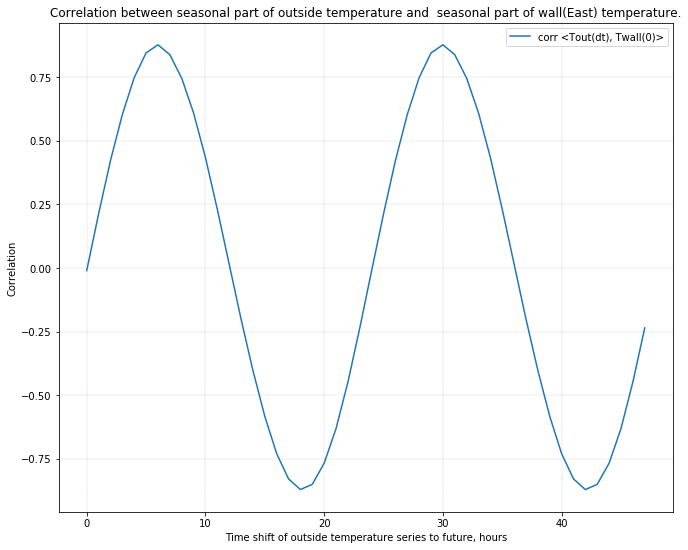

30


In [165]:
s0 = out_t_decomposition.seasonal
s = ins_t1_decomposition.seasonal

dt = np.arange(0, 48, 1)
corr = []
#print(ins_t1_decomposition.seasonal.corr(out_t_decomposition.seasonal))
for item in dt:
    val = s.corr(s0.shift(item))
    corr.append(val)
    #print(val)
    
corr = np.array(corr)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(dt, corr, label='corr <Tout(dt), Twall(0)>')
plt.title('Correlation between seasonal part of outside temperature and  seasonal part of wall(East) temperature.')
ax.set_xlabel('Time shift of outside temperature series to future, hours')
ax.set_ylabel('Correlation')
ax.grid(color='k', linestyle='--', linewidth=0.1)
ax.legend()
plt.show()

print(np.argmax(corr))